In [1]:
import spacy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy.linalg as LA


## Korelacija i kosinus sličnost dva vektora

In [2]:

visina = [100]*100
tezina = [50]*100
imena = ['Mika', 'Zika', 'Pera', 'Laza', 'Djole']*20

def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

def napravi_podatke(visina, tezina, imena):
    for i in range(100):
        dodatak_na_visinu = random.randint(1, 100)
        dodatak_na_tezinu = 0.5*dodatak_na_visinu + random.randint(-5, 5)
        visina[i] = visina[i]+dodatak_na_visinu
        tezina[i] = tezina[i]+dodatak_na_tezinu
    df = pd.DataFrame({'Ime':imena, 'cm': visina, 'kg':tezina})
    return df

df = napravi_podatke(visina, tezina, imena)
df.head()
    


,Ime,cm,kg
0,Mika,111,58.5
1,Zika,186,97.0
2,Pera,178,90.0
3,Laza,161,83.5
4,Djole,197,100.5


In [3]:
kor = df.corr()
print('Pirson r:', round(kor.iloc[0,1],3), '\n')
print('Kosinus sličnost:', round(cosine_similarity(df['kg'], df['cm']), 3))

Pirson r: 0.98 

Kosinus sličnost: 0.999


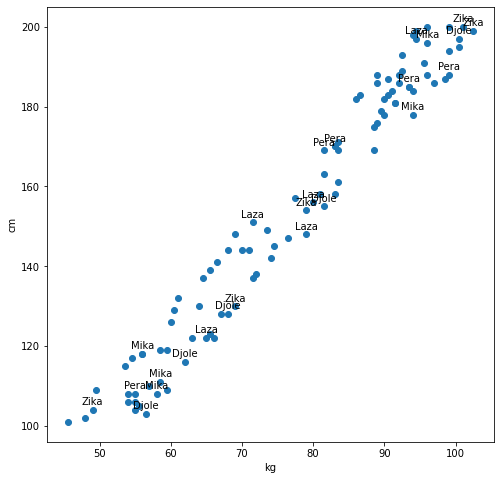

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(df['kg'], df['cm'])
plt.xlabel('kg')
plt.ylabel('cm')
annotated_indices = [0, 5, 10]

for i, txt in enumerate(df['Ime']):
    if i%4 == 0:
        plt.annotate(txt, (df['kg'][i], df['cm'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

#### Kako pronaći dva najsličnija i dva najrazličitija ispitanika? 

In [5]:
df.head()

,Ime,cm,kg
0,Mika,111,58.5
1,Zika,186,97.0
2,Pera,178,90.0
3,Laza,161,83.5
4,Djole,197,100.5


In [6]:
# Računamo kosinus sličnost između svih 100 ispitanika (svakog sa svakim)
# Ali pre toga moramo standardizovati varijable


mean_cm = df['cm'].mean()
std_cm = df['cm'].std()

mean_kg = df['kg'].mean()
std_kg = df['kg'].std()

# Standardize column 'A'
df['cm_std'] = (df['cm'] - mean_cm) / std_cm
df['kg_std'] = (df['kg'] - mean_kg) / std_kg


df_transposed = df.transpose()
df_new = df_transposed.iloc[3:,:]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
cm_std,-1.337377,1.000695,0.7513,0.221337,1.343612,0.938346,-0.277451,1.40596,1.343612,-0.99446,...,1.218915,-0.963286,1.063043,1.281263,-0.77624,-1.617946,1.40596,-0.526846,0.844823,-1.087983
kg_std,-1.155842,1.254771,0.816478,0.409491,1.473918,1.066931,-0.154029,1.098238,1.098238,-0.874082,...,0.973011,-0.717549,1.379998,1.473918,-1.030615,-1.813282,1.599144,-0.780162,0.910398,-1.155842


In [7]:
similarities = []
for col_a in df_new.columns:
    for col_b in df_new.columns:
        if col_a != col_b and col_b <=99:
            similarity = (cosine_similarity(df_new[col_a], df_new[col_b]))
            index = (col_a, col_b)
            similarities.append((index, similarity))

In [8]:
similarities[10:20]

[((0, 11), 0.9860749847263263),
 ((0, 12), 0.9986085415046538),
 ((0, 13), 0.9690621106929108),
 ((0, 14), 0.9859303317023139),
 ((0, 15), 0.9985585523953391),
 ((0, 16), 0.9913511775420347),
 ((0, 17), -0.9939532913204046),
 ((0, 18), -0.9992958157088605),
 ((0, 19), -0.9915783919139406),
 ((0, 20), 0.9997969291954834)]

In [9]:
najslicnija_dva = max(similarities, key=lambda x: x[1])
najrazlicitija_dva = min(similarities, key=lambda x: x[1])

# Print the result
print("Najslicnija dva ispitanika:", najslicnija_dva)
print("Najrazlicitija dva ispitanika:", najrazlicitija_dva)

Najslicnija dva ispitanika: ((17, 98), 1.0000000000000002)
Najrazlicitija dva ispitanika: ((7, 65), -0.9999999981025679)


In [10]:
slican_a, slican_b = najslicnija_dva[0]
df.iloc[[slican_a, slican_b]]

,Ime,cm,kg,cm_std,kg_std
17,Pera,181,91.5,0.844823,0.910398
98,Laza,181,91.5,0.844823,0.910398


In [11]:
razl_a, razl_b = najrazlicitija_dva[0]
df.iloc[[razl_a, razl_b]]


,Ime,cm,kg,cm_std,kg_std
7,Pera,199,94.5,1.405960,1.098238
65,Mika,109,59.5,-1.399726,-1.093229


In [42]:
df.iloc[[razl_a]][['cm_std', 'kg_std']].values[0]


array([1.40596049, 1.09823776])

1.4059604942550217
1.0982377614986945
|| [1.40596049 1.09823776] || =
|| [-1.39972564 -1.0932287 ] || =


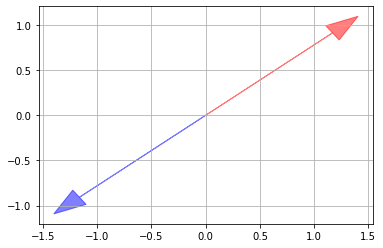

In [52]:


razl1 = np.array(df.iloc[[razl_a]][['cm_std', 'kg_std']].values[0])
razl2 = np.array(df.iloc[[razl_b]][['cm_std', 'kg_std']].values[0])

print(razl1[0])
print(razl1[1])

def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", razl1, "|| =")
vector_norm(razl1)

print("||", razl2, "|| =")
vector_norm(razl2) 

# radius = LA.norm(u)
# plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))

def plot_vector2d(vector2d, origin=[0, 0], head_width = 0.2, head_length=0.3, alpha=1, **options, ):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], head_width=head_width, 
           head_length=head_length, length_includes_head=True, alpha=alpha, **options)

plot_vector2d(razl1, color="red", alpha=0.5)
plot_vector2d(razl2, color="blue", alpha=0.5)
# plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

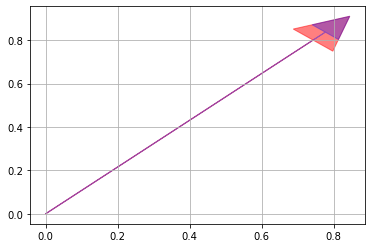

In [55]:
sl1 = np.array(df.iloc[[slican_a]][['cm_std', 'kg_std']].values[0])
sl2 = np.array(df.iloc[[slican_b]][['cm_std', 'kg_std']].values[0])

plot_vector2d(sl1, color="red", head_width = 0.15, head_length=0.15, alpha=0.5)
plot_vector2d(sl2, color="blue", head_width = 0.1, head_length=0.1, alpha=0.3)
# plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

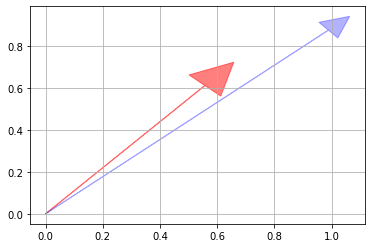

In [58]:
random1 = random.randint(1, 99)
random2 = random.randint(1, 99)
rn1 = np.array(df.iloc[[random1]][['cm_std', 'kg_std']].values[0])
rn2 = np.array(df.iloc[[random2]][['cm_std', 'kg_std']].values[0])

plot_vector2d(rn1, color="red", head_width = 0.15, head_length=0.15, alpha=0.5)
plot_vector2d(rn2, color="blue", head_width = 0.1, head_length=0.1, alpha=0.3)
# plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

### Word vectors and similarities

In [13]:
nlp = spacy.load('en_core_web_md')
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(round(doc1.similarity(doc2),2))

0.87


<AxesSubplot:>

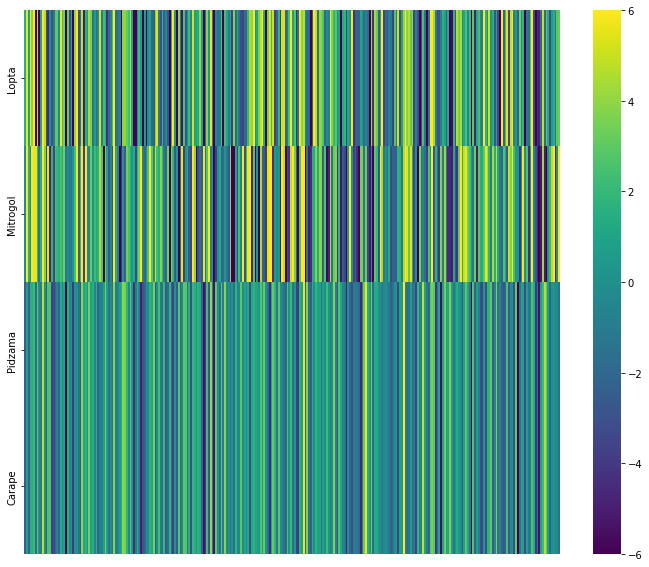

In [14]:


doc = nlp("Two ball goal in pyjamas socks")

# Get the vector for the token "bananas"
ball_vector = doc[1].vector
goal_vector = doc[2].vector
pidzama_vector = doc[4].vector
carape_vector = doc[5].vector
# print(bananas_vector)
embeddings = np.array([ball_vector, goal_vector, pidzama_vector, carape_vector])

plt.figure(figsize=(12,10))
sns.heatmap(embeddings, cmap="viridis", annot=False, xticklabels=False, yticklabels=['Lopta', 'Mitrogol', 'Pidzama', 'Carape'], vmax=6, vmin=-6)

In [15]:
dot_product1 = cosine_similarity(ball_vector, goal_vector)
dot_product2 = round(cosine_similarity(pidzama_vector, carape_vector),3)

print(f"Kosinus slicnost vektora lopta i gol: {dot_product1}")
print(f"Kosinus slicnost vektora pidžama i čarape: {dot_product2}")

Kosinus slicnost vektora lopta i gol: 0.40408238768577576
Kosinus slicnost vektora pidžama i čarape: 1.0


In [16]:
corr1 = np.corrcoef(ball_vector, goal_vector)[0,1]
corr2 = np.corrcoef(pidzama_vector, carape_vector)[0,1]

print(f"Koeficijent korelacije vektora lopta i gol: {corr1}")
print(f"Koeficijent korelacijevektora pidžama i čarape:: {corr2}")


Koeficijent korelacije vektora lopta i gol: 0.3990248833035314
Koeficijent korelacijevektora pidžama i čarape:: 1.0


In [17]:
nlp = spacy.load("en_core_web_md")

# Get vectors for specific words
king_vector = nlp("king").vector
queen_vector = nlp("queen").vector
man_vector = nlp("man").vector
woman_vector = nlp("woman").vector

# Vector arithmetic: king - man + woman = queen
queen_guess_vector = king_vector - man_vector + woman_vector


In [18]:
cokolada = nlp.vocab['chocolate'].vector
kolac = nlp.vocab['cookies'].vector
limun = nlp.vocab['lemon'].vector
limunada = nlp.vocab['lemonade'].vector

In [19]:
new_vector_for_testing = queen_guess_vector
# new_vector_for_testing = chocolate - cake + ball
# new_vector_for_testing =  limun - kolac + cokolada

In [20]:
from scipy import spatial

cosine_similarity = lambda x,y: 1 - spatial.distance.cosine(x,y)

In [21]:
# Find the most similar word to the calculated vector
computed_similarities = []
for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                if not word.is_stop:
                    similarity = cosine_similarity(new_vector_for_testing, word.vector)
                    computed_similarities.append((word, similarity))
                
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

In [22]:
print([w[0].text for w in computed_similarities[:10]])

['king', 'queen', 'havin', 'woman', 'somethin', 'nothin', 'cause', 'ought', 'lovin', 'space']


<AxesSubplot:>

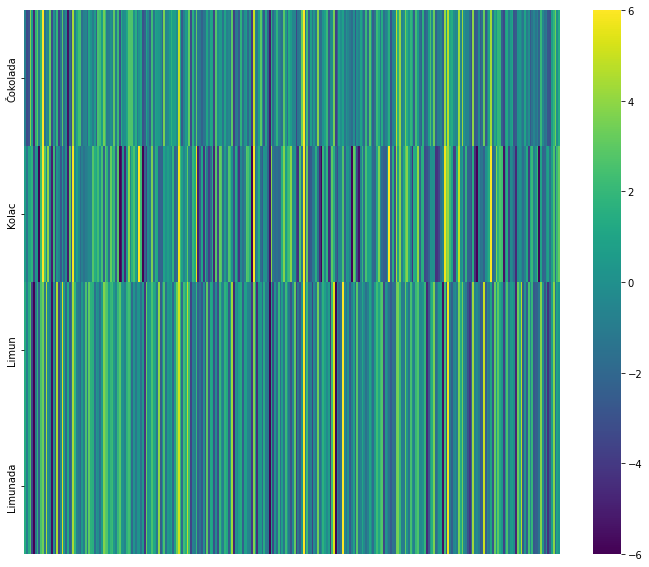

In [23]:
embeddings = np.array([cokolada, kolac, limun, limunada])

plt.figure(figsize=(12,10))
sns.heatmap(embeddings, cmap="viridis", annot=False, xticklabels=False, yticklabels=['Čokolada', 'Kolac', 'Limun', 'Limunada'], vmax=6, vmin=-6)

In [24]:
import numpy as np

def load_glove_model(glove_file):
    print("Loading GloVe Model...")
    with open(glove_file, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    print(f"Done. {len(words)} words loaded!")
    return word_to_vec_map

def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

glove_file_path = 'glove.6B.200d.txt'  # Adjust the path to your downloaded GloVe file
word_to_vec_map = load_glove_model(glove_file_path)

# Example: king - man + woman = queen
king_vec = word_to_vec_map["king"]
man_vec = word_to_vec_map["man"]
woman_vec = word_to_vec_map["woman"]
queen_vec = king_vec - man_vec + woman_vec

# Find the most similar word to the calculated vector
most_similar_word = max(word_to_vec_map.keys(), key=lambda word: cosine_similarity(queen_vec, word_to_vec_map[word]))

print("Predicted queen:", most_similar_word)


Loading GloVe Model...


Done. 400000 words loaded!
Predicted queen: king


In [25]:
import heapq

def find_most_similar_words(reference_vector, word_to_vec_map, top_n=5):
    similarity_heap = []

    for word in word_to_vec_map.keys():
        if word != reference_word:
            similarity = cosine_similarity(reference_vector, word_to_vec_map[word])
            heapq.heappush(similarity_heap, (similarity, word))

    # Get the top N most similar words
    top_similar_words = [word for similarity, word in heapq.nlargest(top_n, similarity_heap)]

    return top_similar_words

# Example usage
reference_word = 'queen'
queen_vec = word_to_vec_map[reference_word]
top_similar_words = find_most_similar_words(queen_vec, word_to_vec_map, top_n=5)

print(f"Top 5 words most similar to 'queen': {top_similar_words}")


Top 5 words most similar to 'queen': ['elizabeth', 'king', 'princess', 'monarch', 'victoria']


In [26]:
# Example usage
reference_word = 'chocolate'
tested_vec = word_to_vec_map[reference_word]
top_similar_words = find_most_similar_words(tested_vec, word_to_vec_map, top_n=5)

print(f"Top 5 words most similar to 'queen': {top_similar_words}")

Top 5 words most similar to 'queen': ['cake', 'cookies', 'cream', 'candy', 'caramel']


In [27]:
import heapq

def find_most_similar_words(reference_vector, word_to_vec_map, top_n=5):
    similarity_heap = []

    for word in word_to_vec_map.keys():
        if word != reference_word:
            similarity = cosine_similarity(reference_vector, word_to_vec_map[word])
            heapq.heappush(similarity_heap, (similarity, word))

    # Get the top N most similar words
    top_similar_words = [word for similarity, word in heapq.nlargest(top_n, similarity_heap)]

    return top_similar_words

# Example usage
reference_word = 'queen'
queen_vec = word_to_vec_map[reference_word]
top_similar_words = find_most_similar_words(queen_vec, word_to_vec_map, top_n=5)

print(f"Top 5 words most similar to 'queen': {top_similar_words}")


Top 5 words most similar to 'queen': ['elizabeth', 'king', 'princess', 'monarch', 'victoria']


In [28]:
# Find the most similar word to the calculated vector
new_vector_for_testing = king_vec - man_vec + woman_vec
computed_similarities = []
for word in word_to_vec_map.keys():
    similarity = cosine_similarity(new_vector_for_testing, word_to_vec_map[word])
    computed_similarities.append((word, similarity))
                
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w for w in computed_similarities[:10]])

[('king', 0.8209067571293023), ('queen', 0.7119165714263136), ('princess', 0.6121214491336003), ('monarch', 0.6024806452435356), ('prince', 0.5960040506895239), ('throne', 0.5915313642749513), ('daughter', 0.5588055718030608), ('elizabeth', 0.5547402774335012), ('kingdom', 0.5494517440184139), ('mother', 0.541981685682989)]


### OpenAI word embeddings

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.embeddings.create(
    input="Your text string goes here",
    model="text-embedding-ada-002"
)

print(response.data[0].embedding)